<a href="https://colab.research.google.com/github/hemapriyamanne/Expected-Loss-Analysis-on-Lending-Club-Data/blob/main/Expected_Loss_Analysis_on_Lending_Club_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [3]:
df_orig=pd.read_csv('gdrive/MyDrive/credit_risk_data/accepted_2007_to_2018Q4.csv',low_memory=False)

# **Intial data analysis to look at the structure and understand the features**

For training our pd model, we will only look at default and fully paid loans

In [4]:
df = df_orig[(df_orig['loan_status']=='Fully Paid') | (df_orig['loan_status']=='Charged Off')]

In [5]:
df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.0,0.0,...,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.0,0.0,...,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,home_improvement,NaN,605xx,IL,10.78,0.0,Aug-2000,695.0,699.0,0.0,NaN,NaN,6.0,0.0,7869.0,56.2,18.0,w,0.0,0.0,...,218418.0,18696.0,6200.0,14877.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,major_purchase,Major purchase,174xx,PA,25.37,1.0,Jun-1998,695.0,699.0,3.0,12.0,NaN,12.0,0.0,21929.0,64.5,35.0,w,0.0,0.0,...,439570.0,95768.0,20300.0,88097.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
5,68426831,NaN,11950.0,11950.0,11950.0,36 months,13.44,405.18,C,C3,Veterinary Tecnician,4 years,RENT,34000.0,Source Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,300xx,GA,10.20,0.0,Oct-1987,690.0,694.0,0.0,NaN,NaN,5.0,0.0,8822.0,68.4,6.0,w,0.0,0.0,...,16900.0,12798.0,9400.0,4000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


Changing the variable to binary classifier

In [6]:
df['loan_status_bin'] = df['loan_status'].map({'Charged Off': 1, 'Fully Paid': 0})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


**Looking at feature grade**

Looking at the number of cutomers accepted in each grade, we can see that the grades with high number of customers are 'B' and 'C'

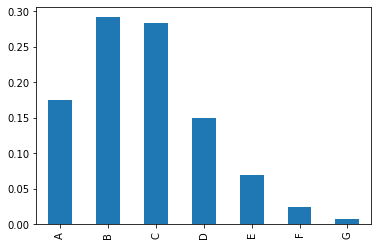

In [7]:
(df['grade'].value_counts().sort_index()/len(df)).plot.bar()

**Looking at feature employment length**

Before we can have a look at the distribution of the employment length we need to transform it into numerical values

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


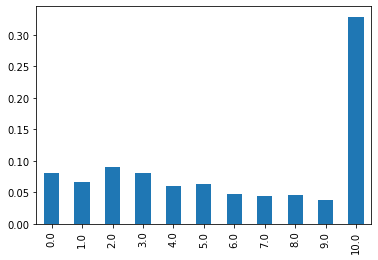

In [8]:
def emp_to_num(term):
    if pd.isna(term):
        return None
    elif term[2]=='+':
        return 10
    elif term[0]=='<':
        return 0
    else:
        return int(term[0])

df['emp_length_num'] = df['emp_length'].apply(emp_to_num)
(df['emp_length_num'].value_counts().sort_index()/len(df)).plot.bar()

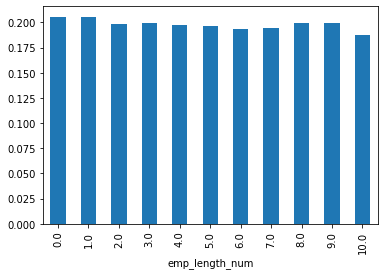

In [9]:
df.groupby('emp_length_num')['loan_status_bin'].mean().plot.bar()

Plotting the relation between employment length and default rate, we can see that there is no relation,i.e almost 2 to 9 have the same default rate, only <= 1 has a slightly higher and >10 has a slightly lower rate,so we will just divide the employment length into 2 variables 10+ and <=1 year

In [10]:
df['long_emp'] = df['emp_length'].apply(lambda x: 1*(x=='10+ years'))
df['short_emp'] = df['emp_length'].apply(lambda x: 1*(x=='1 year' or x=='< 1 year'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


**Let's have a look at the distribution of interest rate**

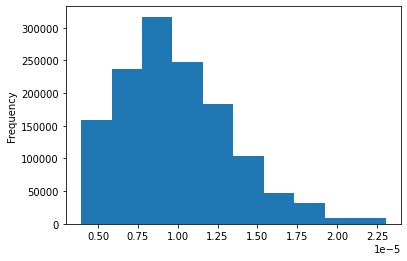

In [11]:
(df['int_rate']/len(df)).plot.hist(bins=10)

**Let's have a look at the distribution of annual income**

This seems so be log-normal-distributed so we do a log-transform.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


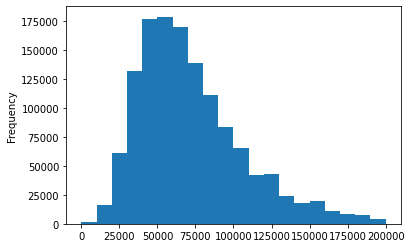

In [12]:
df[df['annual_inc']<200000]['annual_inc'].plot.hist(bins=20)
df['annual_inc_log'] = df['annual_inc'].apply(np.log)

**Looking at feature purpose**

We can see that the most frequent purpose is debt consolidation

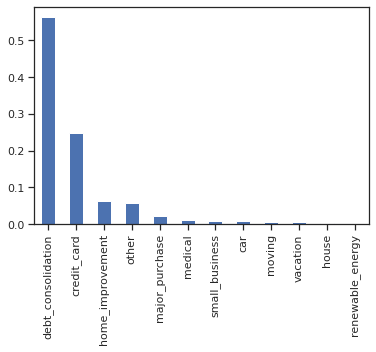

In [ ]:
(df['purpose'].value_counts()/len(df)).plot.bar()

**Looking at the relationship between grade,default rate and interest rate**

We can see almost a linear relation between default rate and grade

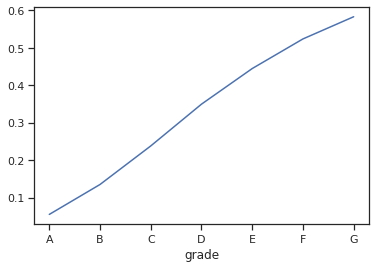

In [ ]:
df.groupby('grade')['loan_status_bin'].mean().plot.line()



```
# This is formatted as code
```

We can also see an almost linear relation between interest rate and grade

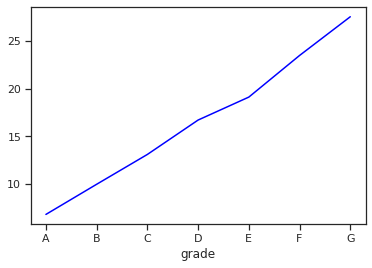

In [ ]:
df.groupby('grade')['int_rate'].mean().plot.line(color='blue')

This means that there is also a linear relationship between interest rate and default rate which is an interesting observation, we will look into this later

**Looking at feature term**

As we can see there are only two possible values for the term on Lending Club, i.e. 36 months or 60 months.

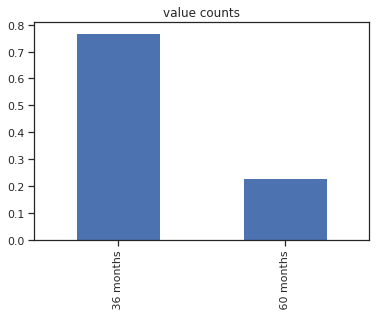

In [ ]:
(df['term'].value_counts()/len(df)).plot.bar(title='value counts')

The accounts with a higher term have a significant higher default rate.

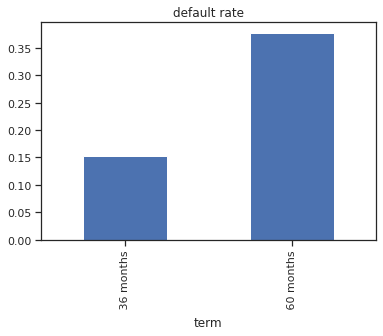

In [ ]:
df.groupby('term')['loan_status_bin'].mean().plot.bar(title='default rate')

**Looking at feature homeownership**

Doing the same with homeownership, the distribution among accounts is as follows

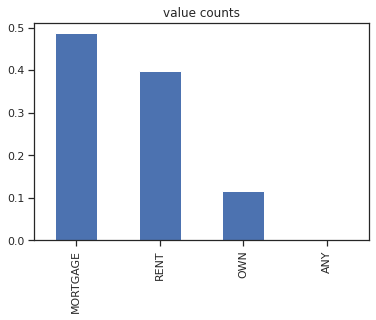

In [ ]:
(df['home_ownership'].value_counts()/len(df)).plot.bar(title='value counts')

We can see that the default is higher in people who rent or own when compared to mortagage

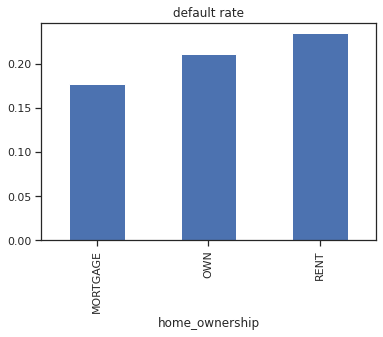

In [ ]:
df[(df['home_ownership']=='MORTGAGE') | (df['home_ownership']=='OWN')| (df['home_ownership']=='RENT')].groupby('home_ownership')['loan_status_bin'].mean().plot.bar(title='default rate')

**Looking at feature FICO score**

Taking a look at the fico score, we can see that most of out customers are in the FICO range 600-750

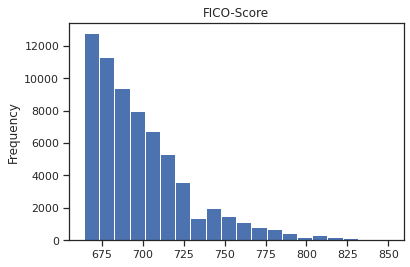

In [ ]:
df['fico_range_high'].plot.hist(bins=20, title='FICO-Score')

**Looking at feature installment**

Also looking at the distribution for installment

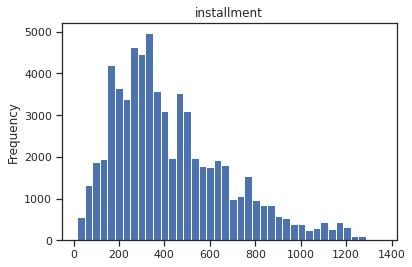

In [ ]:
df['installment'].plot.hist(bins=40, title='installment')

# **Looking at the linear relationship between interest rates and default rates for a particular grade**

As said before there seems to be a linear connection between the interest rate and the default rate. We will use Linear Regression to calculate the linear function that maps from the default rate to the interest rate.

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(df.groupby('sub_grade')['loan_status_bin'].mean().values.reshape(-1,1), y=df.groupby('sub_grade')['int_rate'].mean())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0, 0.5, 'interest rate')

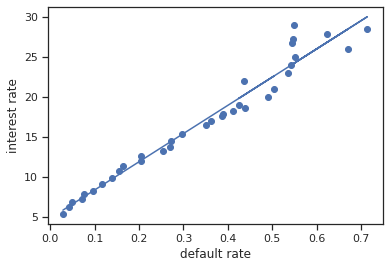

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df.groupby('sub_grade')['loan_status_bin'].mean(), df.groupby('sub_grade')['int_rate'].mean())
plt.plot(df.groupby('sub_grade')['loan_status_bin'].mean(), lr.predict(df.groupby('sub_grade')['loan_status_bin'].mean().values.reshape(-1,1)))
plt.xlabel('default rate')
plt.ylabel('interest rate')

In [ ]:
print('interest rate = ', lr.intercept_, '+', lr.coef_[0], '* default rate')

interest rate =  4.858942215520964 + 35.265938714083156 * default rate


From the above linear relation, we can see that when even in the same grade, if given a higher interest rate people are more likely to default when compared to a lower interest rate

# **Traning the Logisitic Regression for PD model**



Reduce the dataset to the following columns that are known to investors **before** the loan is funded.

In [ ]:
columns = ['loan_amnt', 'term', 'int_rate',
       'installment', 'grade', 'emp_length',
       'home_ownership', 'annual_inc_log', 'verification_status',
       'loan_status_bin', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs',
       'fico_range_low', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc']
df = df[columns]

Drop all rows that contain null-values.

In [ ]:
df.dropna(inplace=True)

Transform the grade into numerical values.

In [ ]:
df['grade']=df['grade'].map({'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7})

Get the dummy-variables for categorical features.

In [ ]:
df_dummies = pd.get_dummies(df)

We are going to drop all dummy-variables which contain not at least 1% ones. In this case we can simply look at the mean of the features because all non-dummy variables have means greater than 0.01.

In [ ]:
drop_columns = df_dummies.columns[(df_dummies.mean()<0.01)]
df_dummies.drop(drop_columns, axis=1, inplace=True)

Add the two different verification status variables that indicate verified to one variable.

In [ ]:
df_dummies['verification_status_Verified_sum'] = df_dummies['verification_status_Source Verified']+df_dummies['verification_status_Verified']
df_dummies.drop(['verification_status_Source Verified', 'verification_status_Verified'], axis=1, inplace=True)

The transformed dataset looks like this

In [ ]:
df_dummies.head()

,loan_amnt,int_rate,installment,grade,annual_inc_log,loan_status_bin,dti,delinq_2yrs,fico_range_low,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,term_ 36 months,term_ 60 months,emp_length_1 year,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_major_purchase,purpose_medical,purpose_other,addr_state_AL,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_FL,addr_state_GA,addr_state_IL,addr_state_IN,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_NC,addr_state_NJ,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OR,addr_state_PA,addr_state_SC,addr_state_TN,addr_state_TX,addr_state_VA,addr_state_WA,addr_state_WI,verification_status_Verified_sum
0,3600.0,13.99,123.03,3,10.915088,0,5.91,0.0,675.0,1.0,7.0,0.0,2765.0,29.7,13.0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,24700.0,11.99,820.28,3,11.082143,0,16.06,1.0,715.0,4.0,22.0,0.0,21470.0,19.2,38.0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,20000.0,10.78,432.66,2,11.050890,0,10.78,0.0,695.0,0.0,6.0,0.0,7869.0,56.2,18.0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,10400.0,22.45,289.91,6,11.556301,0,25.37,1.0,695.0,3.0,12.0,0.0,21929.0,64.5,35.0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
5,11950.0,13.44,405.18,3,10.434116,0,10.20,0.0,690.0,0.0,5.0,0.0,8822.0,68.4,6.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


Seperate features from targets.

In [ ]:
X = df_dummies.drop('loan_status_bin', axis=1)
y = df_dummies['loan_status_bin']

Split the data into training and testing data.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Set up the pipeline. We will use  L1 -penalty for built-in feature selectiob

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

sc = MinMaxScaler()
clf = LogisticRegression(penalty='l2', C=0.01)

pipe_lr = Pipeline([('scaler', sc), ('clf', clf)])

Train the logisitc regression model.

In [ ]:
pipe_lr.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('clf',
                 LogisticRegression(C=0.01, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

# **Evaluating the logistic regression model**

**Here, to look at the accuracy of the model we are looking at ROC-AUC-score.** 


> 
ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0s as 0s and 1s as 1s. A score  of 0.73 means that our is good at differentiating


ROC-AUC-score:  0.7383960611231137


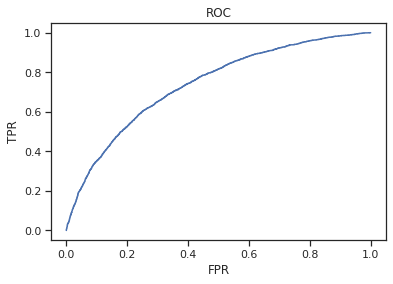

In [ ]:
y_score = pipe_lr.predict_proba(X_test)[:,1]
from sklearn.metrics import roc_auc_score, roc_curve,precision_score, recall_score, precision_recall_curve
fpr, tpr, tresholds = roc_curve(y_test, y_score)
plt.plot(fpr, tpr)
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')

print('ROC-AUC-score: ', roc_auc_score(y_test, y_score))

**Let's see which features are most important**

In [ ]:
for i in np.argsort(-np.abs(pipe_lr.named_steps['clf'].coef_[0])):
    print(X.columns[i], ': ', round(pipe_lr.named_steps['clf'].coef_[0,i], 4))

int_rate :  1.0994
grade :  1.0718
fico_range_low :  -0.7828
inq_last_6mths :  0.419
term_ 60 months :  0.411
term_ 36 months :  -0.411
open_acc :  0.4019
annual_inc_log :  -0.3308
dti :  0.2577
addr_state_OR :  -0.2127
home_ownership_MORTGAGE :  -0.1921
addr_state_LA :  0.1807
addr_state_WA :  -0.1744
installment :  0.1742
addr_state_NJ :  0.1723
addr_state_GA :  -0.1617
home_ownership_RENT :  0.1567
addr_state_CO :  -0.1417
addr_state_TX :  0.1384
addr_state_SC :  -0.1265
addr_state_FL :  0.1057
addr_state_CT :  -0.1035
purpose_credit_card :  -0.094
revol_bal :  -0.0892
addr_state_IL :  -0.0891
verification_status_Verified_sum :  0.0883
verification_status_Not Verified :  -0.0882
addr_state_AL :  0.0872
purpose_other :  -0.0869
addr_state_NY :  0.0758
addr_state_MI :  -0.0725
delinq_2yrs :  0.0677
total_acc :  0.0618
addr_state_IN :  0.0564
purpose_medical :  0.0543
addr_state_AZ :  -0.0541
emp_length_7 years :  -0.0522
addr_state_NV :  0.0488
emp_length_9 years :  0.048
addr_state_O

  > One can control the risk of the investments by choosing different tresholds. The higher one chooses the probability where to seperate good from bad loans the higher the default rate will be. We now write a function that transforms default probabilities to predictions.
  $y_{pred}= \begin{cases} 1 & P(y_{pred}=1) \geq \theta \\ 0 & else \end{cases} $

**By applying varying classification thresholds, we can trace out explicitly the trade-off between preicision and recall from the PR curve.**

In [ ]:
def plot_precision_recall_curve(y_score, y_test, thresholds):
    preds = [np.where(y_score > threshold, 1, 0) for threshold in thresholds]
    precisions = [precision_score(y_test, pred) for pred in preds]
    recalls = [recall_score(y_test, pred) for pred in preds]
    precision_recall = pd.DataFrame({'Precision': precisions, 'Recall': recalls, "Threshold": thresholds})
    

    precision_recall.plot(x = 'Threshold')
    plt.title('Precision, Recall vs. Threshold')
    plt.show()

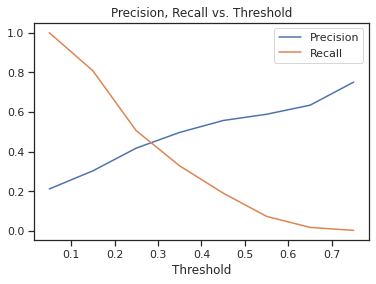

In [ ]:
thresholds = np.arange(0.05, 0.85, 0.1)
plot_precision_recall_curve(y_score, y_test, thresholds)



*   Positive: Charge Off
*   Negative: Fully Paid
*   Precision is defined as True Positive/(True Positive + False Positive).
*   Recall is defined as True Positive/(True Positive + False Negative).

At the default threshold 0.2, we have a precision 0.3 and recall 0.65, which means we have a significant number of false positives. In other words, many borrowers who paid off are predicted to have a charge off.

In the business setting, the threshold is set differently by business objectives. For example, if LendingClub wants to minimize the loan loss due to charge offs, they may want to lower the threshold to get a good recall score. This would reduce the likelihood that the positive class(charge off) is missed. However, on the other side, the precision score would go down, resulting in more false positives. That means a growing number of borrowers who paid off are predicted to have a charge off. This would cause the borrowers to have a bad experience with the company. And more importantly, LendingClub would lose the interest income collected from those who are incorrectly classified. Vice versa.

# **Loan Loss Prediction**

By utilizing the machine learning model, we are trying to predict the loan loss for those current borrowers.

Assume threshold = 0.5.

In [ ]:
business_data_orig=df_orig[df_orig['loan_status'] == 'Current']
business_data = df_orig[df_orig['loan_status'] == 'Current']
business_data['emp_length_num'] = business_data['emp_length'].apply(emp_to_num)
business_data['long_emp'] = business_data['emp_length'].apply(lambda x: 1*(x=='10+ years'))
business_data['short_emp'] = business_data['emp_length'].apply(lambda x: 1*(x=='1 year' or x=='< 1 year'))
business_data['annual_inc_log'] = business_data['annual_inc'].apply(np.log)
columns = ['loan_amnt', 'term', 'int_rate',
       'installment', 'grade', 'emp_length',
       'home_ownership', 'annual_inc_log', 'verification_status','purpose',
       'addr_state', 'dti', 'delinq_2yrs',
       'fico_range_low', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc','funded_amnt']
business_data = business_data[columns]
business_data.dropna(inplace=True)
business_data['grade']=business_data['grade'].map({'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7})
business_data_dummies = pd.get_dummies(business_data)
drop_columns = business_data_dummies.columns[(business_data_dummies.mean()<0.01)]
business_data_dummies.drop(drop_columns, axis=1, inplace=True)
business_data_dummies['verification_status_Verified_sum'] = business_data_dummies['verification_status_Source Verified']+business_data_dummies['verification_status_Verified']
business_data_dummies.drop(['verification_status_Source Verified', 'verification_status_Verified'], axis=1, inplace=True)
business_data_dummies.drop(['funded_amnt'],axis=1, inplace=True)

First we run the model with business data, and get the probability of charge off for each borrower.

In [ ]:
y_score_business_data = pipe_lr.predict_proba(business_data_dummies)[:, 1]

> Secondly we are going to use ECL model to calculate the expected loan loss.

> Expected Credit Loss = LGD x PD x EAD
> The expected loss is calculated as a loan’s LGD multiplied by both its probability of default (PD) and the financial institution’s exposure at default (EAD).

> LGD(%): the amount unrecovered by the lender after selling the underlying asset if a borrower defaults on a loan. Because there is no collateral requirement for all of loans in the data, LGD equals to 1.

> PD: Probability of default, which is the feauture y_score_business_data.

> EAD: Remaining outstanding principal, which is the feature 'funded_amnt'.

In [ ]:
PD = pd.DataFrame(y_score_business_data.reshape(-1, 1))
EAD = pd.DataFrame(business_data['funded_amnt'])

Expected_Loss = PD.values * EAD.values
Expected_Loss

array([[5132.76388799],
       [3268.08672071],
       [3730.16666851],
       ...,
       [2465.82793914],
       [3512.29649753],
       [2705.52650699]])

In [ ]:
business_data['expected_loss'] = Expected_Loss

In [ ]:
print('We have {} current borrowers totally.'.format(business_data.shape[0]))

We have 8223 current borrowers totally.


**Distribution of Expected Loss**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



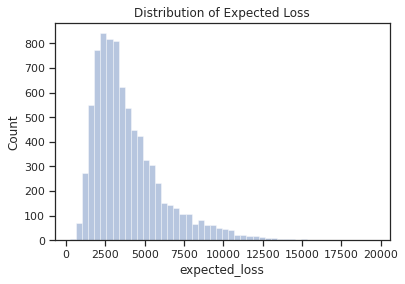

In [ ]:
import seaborn as sns
sns.set(style = 'ticks')
sns.distplot(business_data['expected_loss'], kde = False)
plt.title('Distribution of Expected Loss')
plt.ylabel("Count")
plt.show()

In [ ]:
business_data['expected_loss'].describe()

count     8223.000000
mean      3946.958707
std       2276.235418
min        249.357137
25%       2353.784829
50%       3329.980587
75%       4886.480308
max      19584.462838
Name: expected_loss, dtype: float64

The mean expected loss is \$3950. Over 30% of current borrowers owe less than $2500, while 75% of the population owe less than \$5000. But we could also see some substantial loss, says \$19000 or beyond.

**Grade vs. loan loss**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



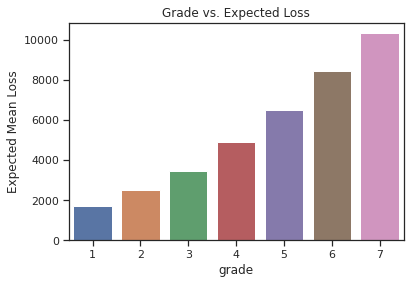

In [ ]:
loss_by_grade = business_data[['grade', 'expected_loss']].groupby('grade').mean() \
                                                  .sort_values('expected_loss', ascending = False).head(10)

sns.barplot(loss_by_grade.index, loss_by_grade['expected_loss'])
plt.title('Grade vs. Expected Loss')
plt.ylabel("Expected Mean Loss")
plt.show()

The higher the grade, the less the mean loss. We would suggest enhancing scrutiny for borrowers with low grades since they are more likely to have charge offs with the greater amount.

**Term vs. loan loss**

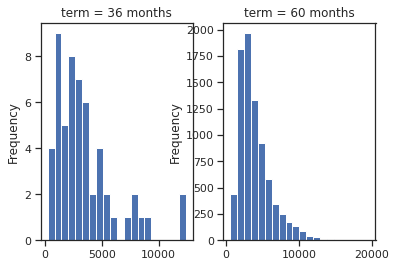

In [ ]:
plt.subplot(1,2,1)
business_data[business_data['term']==' 36 months']['expected_loss'].plot.hist(bins=20,title='term = 36 months')
plt.subplot(1,2,2)
business_data[business_data['term']== ' 60 months']['expected_loss'].plot.hist(bins=20,title='term = 60 months')

We could see that most of our current payments are in the 60 month term, and we could also see that most of them are less than  \$10000 and in 36 months, since the number of loans are low the distribution is deverse

**Loan Loss by State**

In [ ]:
 ls_state = business_data[['addr_state', 'expected_loss']].groupby('addr_state', as_index = False).sum() \
                                                  .sort_values('expected_loss', ascending = False)
ls_state.columns = ['State', 'Expected Loss']

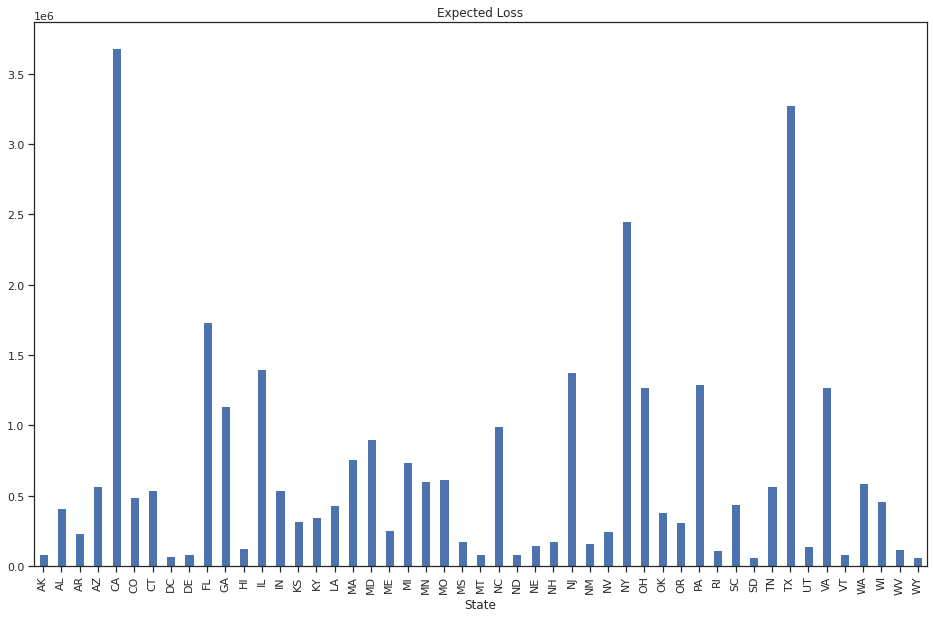

In [ ]:
ls_state.groupby('State')['Expected Loss'].mean().plot.bar(title='Expected Loss',figsize=(16, 10))

California, New York, and Texas are the top three states with the highest expected loss. We would suggest making significant efforts to collect outstanding payments in these state. Also, stronger scrutiny on requests from these states